In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import numpy as np

In [5]:
total_precision = []
total_recall = []
total_fscore = []
total_accuracy = []

In [6]:
for k in range(1, 11):  # Test k values from 1 to 10
    # Load dataset
    dataset = pd.read_csv("features_model.csv")
    
    # Separate features and labels
    y = dataset["label"].values
    X = dataset.drop(columns="label").values

    # Initialize StratifiedKFold
    sfk = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

    # Lists to store predictions and true labels
    y_pred_list_kfold = []
    y_test_list_kfold = []

    # Perform Stratified K-Fold cross-validation
    for train_index, test_index in sfk.split(X, y):
        # Split the dataset into training and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Remove duplicates from the training data
        df = pd.DataFrame(X_train)
        df['label'] = y_train
        df = df.drop_duplicates()
        y_train = df["label"].values
        X_train = df.drop(columns="label").values

        # Train K-Nearest Neighbors classifier
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Append predictions and true labels for this fold
        y_pred_list_kfold.extend(y_pred)
        y_test_list_kfold.extend(y_test)


    # Calculate metrics
    balance_accuracy = accuracy_score(y_test_list_kfold, y_pred_list_kfold)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test_list_kfold, y_pred_list_kfold, average='macro')
    # Store metrics for current value of k
    total_precision.append(precision * 100)
    total_recall.append(recall * 100)
    total_fscore.append(fscore * 100)
    total_accuracy.append(balance_accuracy * 100)


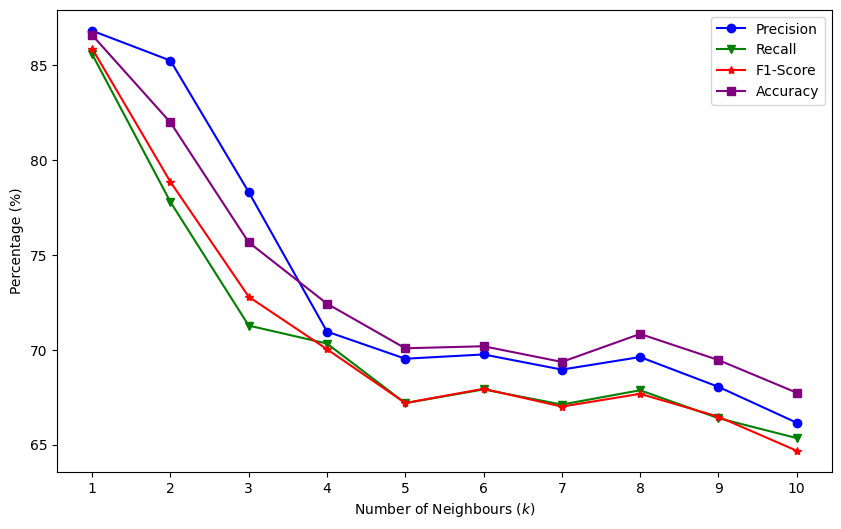

In [7]:
import matplotlib.pyplot as plt

x = range(1, len(total_precision) + 1)


plt.figure(figsize=(10, 6))
plt.plot(x, total_precision, marker='o', label='Precision', color='blue')
plt.plot(x, total_recall, marker='v', label='Recall', color='green')
plt.plot(x, total_fscore, marker='*', label='F1-Score', color='red')
plt.plot(x, total_accuracy, marker='s', label='Accuracy', color='purple')

plt.xticks(np.arange(min(x), max(x) + 1, 1)) 


plt.xlabel('Number of Neighbours ($k$)')
plt.ylabel('Percentage (%)')


plt.legend()
#plt.savefig('function_vs_function_percentage_model_by_k.pdf')
plt.show()

In [1]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv("features_model.csv")
y = dataset["label"].values
X = dataset.drop(columns="label").values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

perm_importance = PermutationImportance(knn).fit(X_test, y_test)

eli5.show_weights(perm_importance, feature_names=list(dataset.drop(columns="label").columns))

Weight,Feature
0.6601 ± 0.0033,size
0.5631 ± 0.0023,cost
0.4307 ± 0.0028,stackframe
0.3821 ± 0.0015,ninst
0.1376 ± 0.0013,edges
0.0588 ± 0.0009,entropy
0.0351 ± 0.0018,nbbs
0.0339 ± 0.0005,nargs
0.0227 ± 0.0008,cc
0.0177 ± 0.0007,nlocals
